# <b>CS156 (Introduction to AI), Spring 2022</b>
# <u><b>Homework 3 submission</b></u>

### Roster Name: Anh Nguyen
### Preferred Name (if different): N/A
### Student ID: 015442011
### Email address: anh.t.nguyen07@sjsu.edu
Any special notes or anything you would like to communicate to me about this homework submission goes in here.

##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
np.random.seed(42)

#### Code the solution

In [3]:
data = pd.read_csv('homework3_input_data.csv')

In [13]:
X = data[['cement', 'slag',
       'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate','age']]
Y = data['csMPa']
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


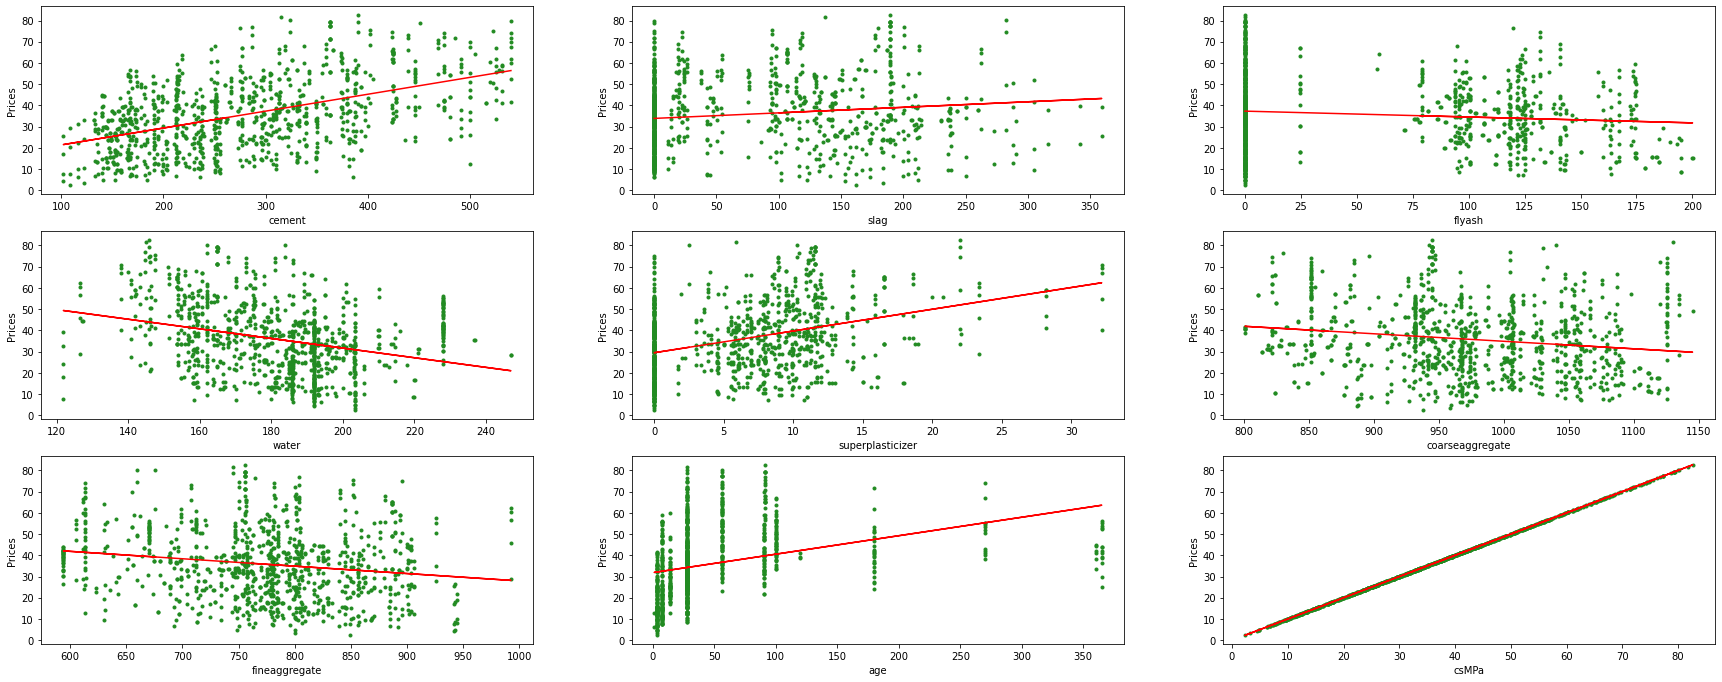

In [6]:
pyplot.figure(figsize=(30,20))
for i, col in enumerate(data.columns[0:13]):
    pyplot.subplot(5, 3, i+1)
    x = data[col]
    y = data['csMPa']
    pyplot.plot(x, y, '.', color="forestgreen")
    
    # linear regression and plotting points
    m, b = np.polyfit(x, y, 1)
    pyplot.plot(x, m*x + b, color="red")
    pyplot.xlabel(col)
    pyplot.ylabel('Prices')

<AxesSubplot:>

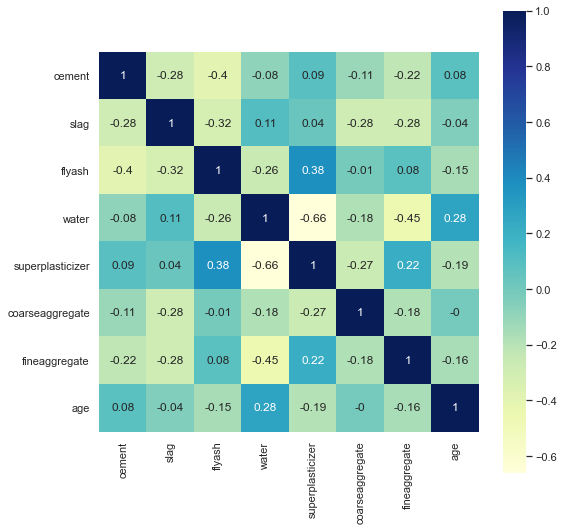

In [7]:
features = X
sns.set(rc={'figure.figsize': (8.5, 8.5)}) 
sns.heatmap(features.corr().round(2), square=True, cmap='YlGnBu', annot=True)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((824, 8), (824,), (206, 8), (206,))

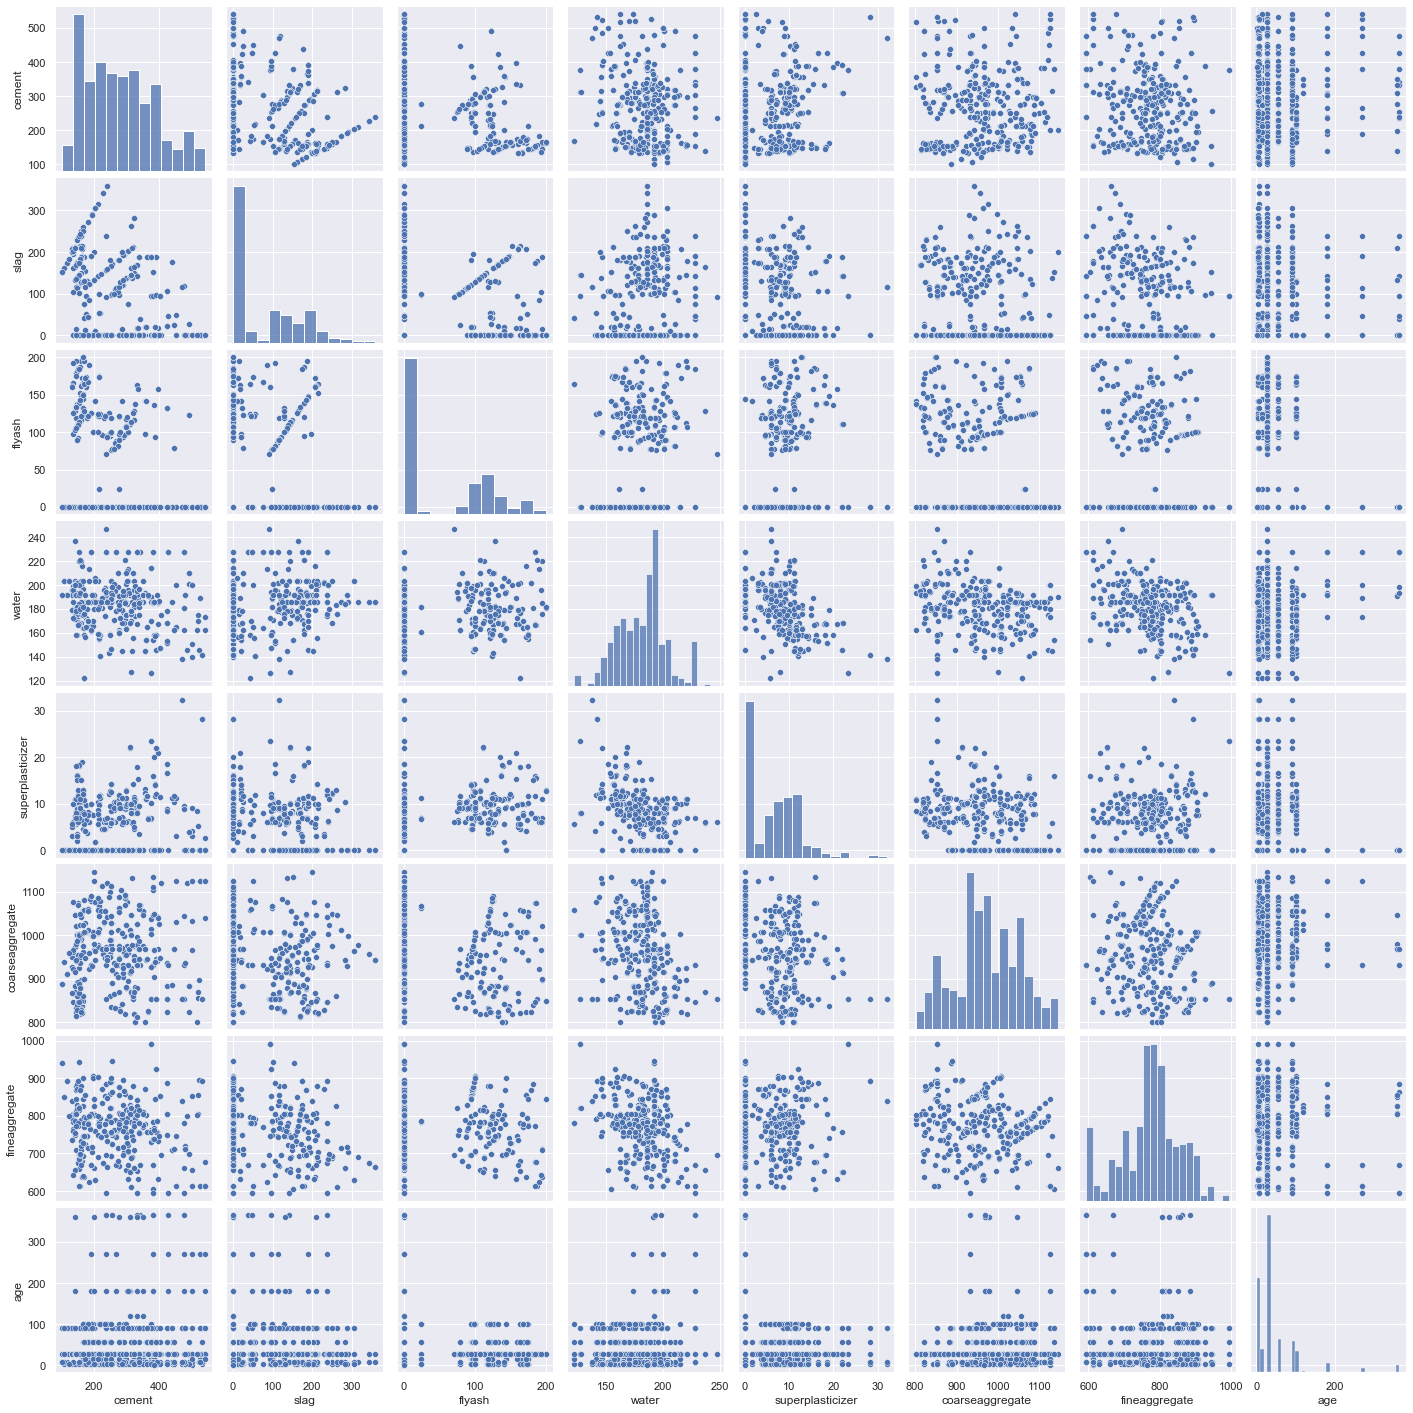

In [9]:
train_data = pd.DataFrame(X_train, columns=data.columns.values)
train_data['Happiness Score'] = Y_train
sns.pairplot(train_data, vars = features)

In [10]:
model = linear_model.LinearRegression().fit(X_train, Y_train)

In [11]:

print('Coefficients: \n', model.coef_)

Y_test_pred = model.predict(X_test)

# Printing mean squared error
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_test_pred))

# Printing coefficient of determination
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_test_pred))

Coefficients: 
 [ 0.11923772  0.10881555  0.0911555  -0.14527714  0.31551104  0.02225423
  0.02248514  0.11520355]
Mean squared error: 95.62
Coefficient of determination: 0.64


Text(0, 0.5, 'Predicted Y')

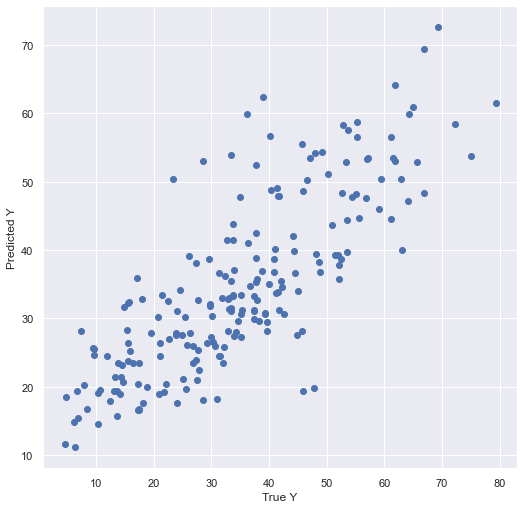

In [12]:
# scatter diagram 
pyplot.scatter(Y_test,Y_test_pred)
pyplot.xlabel('True Y')
pyplot.ylabel('Predicted Y')